In [47]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import csv
import datetime as dt
import matplotlib.dates as dates
import pandasql as ps
from pandasql import sqldf
from sqlite3 import connect
from copy import deepcopy
from pandas import Series, DataFrame
import pywedge as pw
from bokeh.io import output_notebook
from bokeh.plotting import figure,show




# Bokeh   1

In [48]:
testBokeh =figure()
testBokeh.line([2,3,6,8,10,12],[20,30,40,50,60,70],line_width=4,line_color="red")
output_notebook()

Loading BokehJS ...

In [49]:
show(testBokeh)

#### USE esc  and M for markdown / esc +Y for code

## imported copy from deepcopy using FUGUESQL     2


In [50]:
###imported copy from deepcopy
# created variable for url and import data into tables
URL ="https://en.wikipedia.org/wiki/The_Top_100:_NFL%27s_Greatest_Players"
tables = pd.read_html(URL)

In [51]:
#checking lenth of tables on the site
len(tables)

2

In [52]:
# cleaning the table and bringing in 
data =tables[0]
data

,Rank,Player,Position,Team(s)†,Year inducted to Pro Football Hall of Fame
0,1,Jerry Rice,WR,49ers,2010.0
1,2,Jim Brown,FB,Browns,1971.0
2,3,Lawrence Taylor,LB,Giants,1999.0
3,4,Joe Montana,QB,49ers,2000.0
4,5,Walter Payton,RB,Bears,1993.0
...,...,...,...,...,...
95,96,Mel Hein,C,Giants,1963.0
96,97,Derrick Brooks,LB,Buccaneers,2014.0
97,98,Lee Roy Selmon,DE,Buccaneers,1995.0
98,99,Michael Strahan,DE,Giants,2014.0


In [53]:
# if want to get two columns only
onlycolumns=deepcopy(data[["Player","Position"]])
onlycolumns


,Player,Position
0,Jerry Rice,WR
1,Jim Brown,FB
2,Lawrence Taylor,LB
3,Joe Montana,QB
4,Walter Payton,RB
...,...,...
95,Mel Hein,C
96,Derrick Brooks,LB
97,Lee Roy Selmon,DE
98,Michael Strahan,DE


In [54]:
#instal fugue for sql queris for this
# import sql from fugue  from fugue_sql import fsql
from fugue_sql import fsql

Q_1 = """
SELECT * FROM onlycolumns
PRINT
"""

In [55]:
# Running Query
fsql(Q_1).run()

PandasDataFrame
Player:str                                                                             |Position:str
---------------------------------------------------------------------------------------+------------
Jerry Rice                                                                             |WR          
Jim Brown                                                                              |FB          
Lawrence Taylor                                                                        |LB          
Joe Montana                                                                            |QB          
Walter Payton                                                                          |RB          
Johnny Unitas                                                                          |QB          
Reggie White                                                                           |DE          
Peyton Manning                                                             

FugueWorkflowResult()

In [56]:
#re = pd.read_csv('RealEstateSales.csv',low_memory=False)
#print(re.query("Assessed_Value == 200"))


from fugue_sql import fsql
re = pd.read_csv('RealEstateSales.csv',low_memory=False)


queryRE = """
SELECT * FROM re WHERE Assessed_Value == 200
PRINT
"""

In [57]:
# How many rows in file
re.shape

(997213, 7)

In [58]:
# Running Query On real estate
fsql(queryRE).run()

PandasDataFrame
Year:long|Date_Recorded:str|Town:str |Assessed_Value:long|Sale_Amount:double|`Property Type`:str|`Residential Type`:str
---------+-----------------+---------+-------------------+------------------+-------------------+----------------------
2020     |6/21/2021        |Coventry |200                |142500.0          |Vacant Land        |NULL                  
2001     |9/18/2002        |East Gran|200                |227900.0          |NULL               |NULL                  
         |                 |by       |                   |                  |                   |                      
2001     |8/30/2002        |Lyme     |200                |15000.0           |NULL               |NULL                  
2001     |1/2/2002         |Eastford |200                |29500.0           |NULL               |NULL                  
2001     |6/5/2002         |Easton   |200                |0.0               |NULL               |NULL                  
2001     |5/6/2002      

FugueWorkflowResult()

In [59]:
# if want to get two columns only from Real esteate
onlycolumns=deepcopy(re[["Sale_Amount","Town"]])
onlycolumns


,Sale_Amount,Town
0,248400.0,Ansonia
1,239900.0,Ansonia
2,325000.0,Ansonia
3,202500.0,Ansonia
4,400000.0,Avon
...,...,...
997208,53100.0,New London
997209,76000.0,Waterbury
997210,210000.0,Windsor Locks
997211,280000.0,Middletown


In [60]:
# how many sales were done in each town
queryRE2 = """
SELECT Town, Count(*)  FROM re
GROUP BY Town 
PRINT
"""

In [61]:
fsql(queryRE2).run()

PandasDataFrame
Town:str                                                                         |_8f4d553e15f3:long
---------------------------------------------------------------------------------+------------------
***Unknown***                                                                    |1                 
Andover                                                                          |889               
Ansonia                                                                          |4445              
Ashford                                                                          |1385              
Avon                                                                             |7029              
Barkhamsted                                                                      |1030              
Beacon Falls                                                                     |1890              
Berlin                                                                     

FugueWorkflowResult()

# Joining two tables   3

In [62]:
#Joining two tables. First echicking RealEstateSales. ***FIRST TABLE***

re = pd.read_csv('RealEstateSales.csv',low_memory=False)

In [63]:
re.head(1)

,Year,Date_Recorded,Town,Assessed_Value,Sale_Amount,Property Type,Residential Type
0,2020,4/14/2021,Ansonia,133000,248400.0,Residential,Single Family


In [64]:
# 2nd Table  from Google Stock
dfaapl = pd.read_csv('AAPL.csv',index_col='Date',parse_dates= True)

In [65]:
dfaapl.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-28,172.169998,175.729996,172.0,175.600006,174.542679,90371900


In [73]:
conn = sqlite3.connect(':memory:')
dfaapl.to_sql("dfaapl",conn)
re.to_sql("re",conn)
def sql(a_string):
    return(pd.read_sql(a_string,conn))

C:\Users\sajid\anaconda3\lib\site-packages\pandas\core\generic.py:2872: UserWarning:

The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.



In [75]:
#Two Tables Joined

sql("""SELECT a.Date, e.Year FROM dfaapl As a
 
    LEFT JOIN 
    re AS e
    ON a.Date = e.Year
   """)

,Date,Year
0,2022-03-28 00:00:00,None
1,2022-03-29 00:00:00,None
2,2022-03-30 00:00:00,None
3,2022-03-31 00:00:00,None
4,2022-04-01 00:00:00,None
...,...,...
246,2023-03-21 00:00:00,None
247,2023-03-22 00:00:00,None
248,2023-03-23 00:00:00,None
249,2023-03-24 00:00:00,None


In [20]:
#re = pd.read_csv('RealEstateSales.csv',low_memory=False)
#print(re.query("Assessed_Value == 200")) with GROUP BY QUERY BY TOWN with WHERE and HOw Many SALES


from fugue_sql import fsql
re = pd.read_csv('RealEstateSales.csv',low_memory=False)


queryRE5 = """
SELECT Town, COUNT(*) FROM re WHERE Assessed_Value == 200
GROUP BY Town
PRINT
"""

In [21]:
fsql(queryRE5).run()

PandasDataFrame
Town:str                                                                         |_89066fbce978:long
---------------------------------------------------------------------------------+------------------
Andover                                                                          |1                 
Burlington                                                                       |3                 
Coventry                                                                         |3                 
East Granby                                                                      |2                 
East Haddam                                                                      |1                 
East Haven                                                                       |1                 
Eastford                                                                         |1                 
Easton                                                                     

FugueWorkflowResult()

# SeaBorn Magic   4

In [22]:
df = pd.read_csv('monthly_SingleHome_family.csv')

In [23]:
df.shape

(2358, 4)

In [24]:
df.head(10)

,Date,Median_Sale_Price,Average_Sale_Price,County
0,1-Jan,393638.73,646535.35,Fairfield
1,1-Feb,374604.75,652568.27,Fairfield
2,1-Mar,NaN,619265.04,Fairfield
3,1-Apr,396878.55,617362.17,Fairfield
4,1-May,427616.39,613559.53,Fairfield
5,1-Jun,453575.49,689000.49,Fairfield
6,1-Jul,461675.05,698997.41,Fairfield
7,1-Aug,NaN,730031.12,Fairfield
8,1-Sep,417937.41,612745.04,Fairfield
9,1-Oct,396878.55,572847.76,Fairfield


<AxesSubplot:xlabel='Average_Sale_Price', ylabel='Density'>

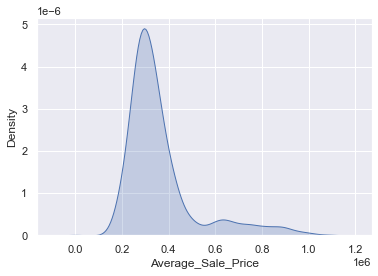

In [25]:


sns.kdeplot(df["Average_Sale_Price"], fill = True)

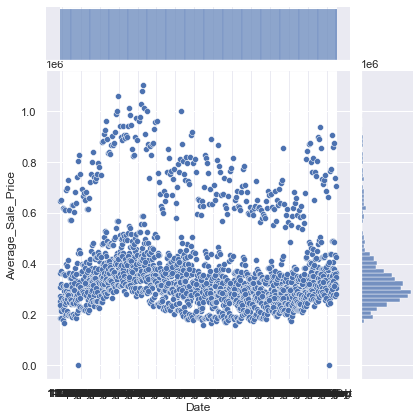

In [26]:
sns.jointplot(x =df["Date"], y =df["Average_Sale_Price"])

## working with pandasql   5

In [27]:
#Working with first dataSet Traffic Crash

#install pip install pandasql

tc = pd.read_csv('Traffic_Crashes.csv',low_memory=False)
print(tc.query("POSTED_SPEED_LIMIT > 95"))

           RD_NO CRASH_DATE_EST_I        CRASH_DATE  POSTED_SPEED_LIMIT  \
1252    HY428836              NaN   9/18/2015 18:00                99.0   
6851    HY437937              NaN   9/25/2015 15:00                99.0   
43032   HY453481              NaN   10/7/2015 18:00                99.0   
44014   HY446035              NaN   10/1/2015 17:44                99.0   
71023   HY428895              NaN   9/18/2015 19:30                99.0   
98204   HY468480              NaN  10/19/2015 15:30                99.0   
101061  HY426077              NaN   9/14/2015 20:21                99.0   
113054  HY460543              NaN  10/13/2015 12:36                99.0   

       TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION WEATHER_CONDITION  \
1252              NO CONTROLS           NO CONTROLS              RAIN   
6851                  UNKNOWN               UNKNOWN             CLEAR   
43032             NO CONTROLS           NO CONTROLS           UNKNOWN   
44014          TRAFFIC SIGNAL  F

In [28]:
# more data pulling

print(tc.query("ALIGNMENT== 'CURVE ON HILLCREST'"))

           RD_NO CRASH_DATE_EST_I        CRASH_DATE  POSTED_SPEED_LIMIT  \
800     JF164874              NaN     3/6/2022 5:30                25.0   
1054    JE401146              NaN    10/7/2021 9:10                30.0   
4543    JA552402              NaN   12/17/2017 6:02                40.0   
9225    JB313142              NaN    6/19/2018 5:45                30.0   
10273   JF449684              NaN   10/26/2022 6:32                40.0   
10789   JA172460              NaN     3/1/2017 6:58                15.0   
17648   HY434869              NaN   9/23/2015 10:10                 5.0   
23528   JG237535              NaN    4/26/2023 4:10                30.0   
30725   JE487163              NaN  12/23/2021 17:55                45.0   
32678   JB355271              NaN   7/18/2018 15:48                30.0   
33122   JA342142              NaN   7/10/2017 12:55                15.0   
34229   JC126720              NaN   1/23/2019 12:45                 0.0   
34256   HY418402         

# Pivot Table  6

In [29]:
#What is average Sale Ammount from RealEstateSale.csv
from fugue_sql import fsql
re = pd.read_csv('RealEstateSales.csv',low_memory=False)
re["Sale_Amount"].mean()


391151.1835411992

In [30]:
re.head(2)

,Year,Date_Recorded,Town,Assessed_Value,Sale_Amount,Property Type,Residential Type
0,2020,4/14/2021,Ansonia,133000,248400.0,Residential,Single Family
1,2020,5/26/2021,Ansonia,110500,239900.0,Residential,Three Family


In [31]:
# what was the average sale Amound for each propery by year
re.groupby('Year')['Sale_Amount'].mean()

Year
2001    246235.035160
2002    296357.123706
2003    327217.932922
2004    380297.014169
2005    364030.126084
2006    475379.225385
2007    435713.379734
2008    325831.792393
2009    355250.327162
2010    331657.472575
2011    391684.320747
2012    395477.676013
2013    413516.239641
2014    401421.941220
2015    345883.763949
2016    507761.249272
2017    393251.314693
2018    383727.664935
2019    420296.971308
2020    604963.871051
Name: Sale_Amount, dtype: float64

In [32]:
#what was the everage sale price  by Propery TYpe
re.groupby('Property Type')['Sale_Amount'].mean()

Property Type
Apartments        1.283431e+07
Commercial        1.788884e+06
Condo             2.602110e+05
Four Family       3.142910e+05
Industrial        2.004287e+06
Public Utility    3.697088e+05
Residential       4.793562e+05
Single Family     3.885143e+05
Three Family      1.798445e+05
Two Family        1.990446e+05
Vacant Land       2.957016e+05
Name: Sale_Amount, dtype: float64

## little more completed Pivot Table

In [33]:
#what was the sale price per year and per property type
re.pivot_table(index='Year', columns='Property Type', values='Sale_Amount',)

Property Type,Apartments,Commercial,Condo,Four Family,Industrial,Public Utility,Residential,Single Family,Three Family,Two Family,Vacant Land
Year,,,,,,,,,,,
2006,NaN,NaN,263855.485288,282921.360000,NaN,NaN,NaN,494005.835730,273186.098990,287331.290291,NaN
2007,NaN,NaN,259575.594830,248420.412371,NaN,NaN,NaN,440378.104421,227203.317384,235021.026248,NaN
2008,NaN,NaN,226977.432045,186691.305785,NaN,NaN,NaN,337419.171163,134311.645433,171057.364583,NaN
2009,NaN,NaN,233941.101976,144914.303571,NaN,NaN,NaN,392689.981115,128508.331922,161579.422482,NaN
2010,NaN,NaN,219673.473015,141680.120253,NaN,NaN,NaN,342001.401129,119343.005313,139352.705739,NaN
2011,NaN,NaN,229578.501068,175038.240876,NaN,NaN,NaN,418717.252397,131267.032951,153235.362653,NaN
2012,NaN,NaN,234139.867139,189096.560345,NaN,NaN,NaN,406589.585810,151693.587646,176135.262447,NaN
2013,NaN,NaN,237431.980220,207386.267123,NaN,NaN,NaN,377142.166824,143030.081725,167958.417840,NaN
2014,NaN,NaN,237641.014457,220822.066265,NaN,NaN,NaN,388310.009168,150532.109359,174318.449262,NaN


In [34]:
#what was the *Max* price per year and per property type
re.pivot_table(index='Year', columns='Property Type', values='Sale_Amount' ,aggfunc='max')

Property Type,Apartments,Commercial,Condo,Four Family,Industrial,Public Utility,Residential,Single Family,Three Family,Two Family,Vacant Land
Year,,,,,,,,,,,
2006,NaN,NaN,39885000.0,691000.0,NaN,NaN,NaN,30830293.0,6700000.0,15100000.0,NaN
2007,NaN,NaN,7943000.0,1000000.0,NaN,NaN,NaN,30000000.0,2900000.0,7750000.0,NaN
2008,NaN,NaN,3800000.0,925000.0,NaN,NaN,NaN,22500000.0,2315000.0,3400000.0,NaN
2009,NaN,NaN,24081236.0,500000.0,NaN,NaN,NaN,31375000.0,1150000.0,2400000.0,NaN
2010,NaN,NaN,13978066.0,573400.0,NaN,NaN,NaN,11222010.0,925000.0,925000.0,NaN
2011,NaN,NaN,4850000.0,2125000.0,NaN,NaN,NaN,20500000.0,1950000.0,2200000.0,NaN
2012,NaN,NaN,22250000.0,800000.0,NaN,NaN,NaN,24000000.0,1800000.0,6380000.0,NaN
2013,NaN,NaN,23350000.0,842500.0,NaN,NaN,NaN,120000000.0,2000000.0,3200000.0,NaN
2014,NaN,NaN,14325000.0,3100000.0,NaN,NaN,NaN,26000000.0,1650000.0,2105000.0,NaN


# interactive dashboard   7

In [35]:
#What columns do I have
re.columns


Index(['Year', 'Date_Recorded', 'Town', 'Assessed_Value', 'Sale_Amount',
       'Property Type', 'Residential Type'],
      dtype='object')

In [36]:
#Creating new object using Pywedge_charts for making charts
mcharts=pw.Pywedge_Charts(re,c=None, y="Year")

C:\Users\sajid\anaconda3\lib\site-packages\pywedge\pywedge.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  self.X = self.train.drop(self.y,1)


In [37]:
charts=mcharts.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [38]:
#working with 2nd dataSet  Real Estate
re = pd.read_csv('RealEstateSales.csv',low_memory=False)
print(re.query("Assessed_Value == 200"))

        Year Date_Recorded          Town  Assessed_Value  Sale_Amount  \
6487    2020     6/21/2021      Coventry             200     142500.0   
69958   2001     9/18/2002   East Granby             200     227900.0   
77130   2001     8/30/2002          Lyme             200      15000.0   
82951   2001      1/2/2002      Eastford             200      29500.0   
87361   2001      6/5/2002        Easton             200          0.0   
87931   2001      5/6/2002    East Haven             200      40000.0   
92640   2001      1/3/2002     Killingly             200      20000.0   
93610   2001      6/7/2002          Lyme             200     119000.0   
194662  2003     7/15/2004        Orange             200     521000.0   
235466  2003     5/28/2004     Killingly             200     174500.0   
249468  2003     3/26/2004    Stonington             200       2500.0   
308567  2004    11/19/2004  Wethersfield             200       3000.0   
342984  2004     8/30/2005    Stonington           

<AxesSubplot:xlabel='CRASH_MONTH', ylabel='CRASH_HOUR'>

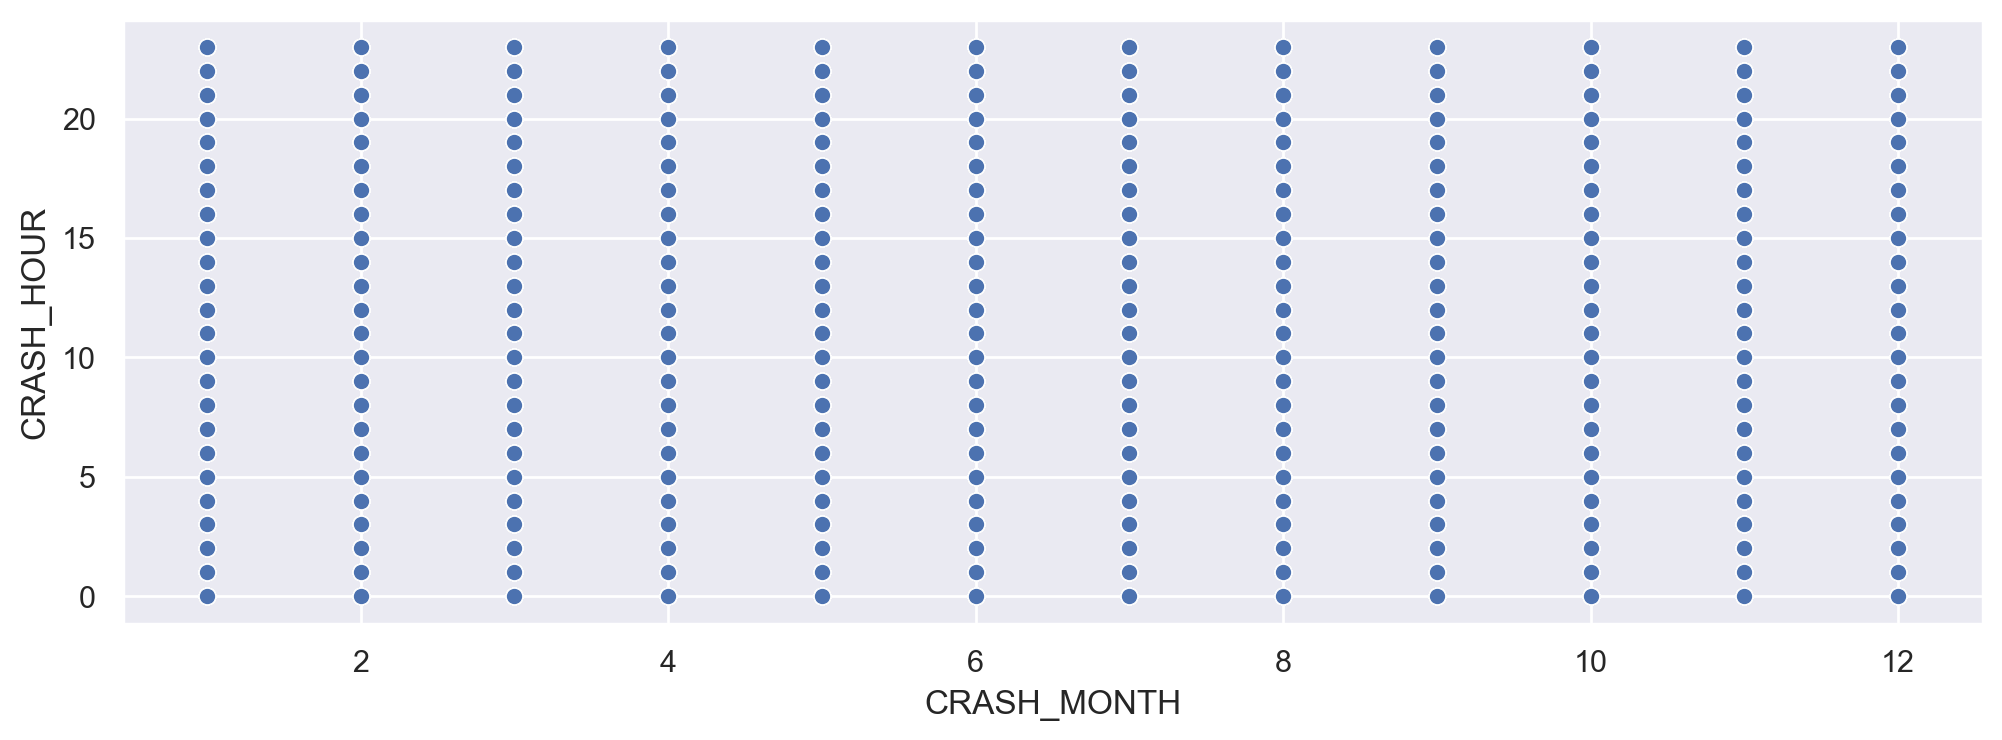

In [45]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(x=tc['CRASH_MONTH'],
                y=tc['CRASH_HOUR'])

++
*-# Reading the Data from CSV File

In [2]:
df = pd.read_csv('monthly_SingleHome_family.csv')

In [3]:
# First to test if I have missing value.  True shows there is missing number

df.isnull()



,Date,Median_Sale_Price,Average_Sale_Price,County
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2353,False,False,False,False
2354,False,False,False,False
2355,False,False,False,False
2356,False,False,False,False


In [4]:
# counting how many  missing volues

pd.isnull(df).sum().sum()

5

In [5]:
#detect a list of missing values

missing_Valus=[""]
missing=df.isin(missing_Valus)
missing.head


<bound method NDFrame.head of        Date  Median_Sale_Price  Average_Sale_Price  County
0     False              False               False   False
1     False              False               False   False
2     False              False               False   False
3     False              False               False   False
4     False              False               False   False
...     ...                ...                 ...     ...
2353  False              False               False   False
2354  False              False               False   False
2355  False              False               False   False
2356  False              False               False   False
2357  False              False               False   False

[2358 rows x 4 columns]>

In [6]:
df.head(15)

,Date,Median_Sale_Price,Average_Sale_Price,County
0,1-Jan,393638.73,646535.35,Fairfield
1,1-Feb,374604.75,652568.27,Fairfield
2,1-Mar,NaN,619265.04,Fairfield
3,1-Apr,396878.55,617362.17,Fairfield
4,1-May,427616.39,613559.53,Fairfield
5,1-Jun,453575.49,689000.49,Fairfield
6,1-Jul,461675.05,698997.41,Fairfield
7,1-Aug,NaN,730031.12,Fairfield
8,1-Sep,417937.41,612745.04,Fairfield
9,1-Oct,396878.55,572847.76,Fairfield


# Removing the 0s and Null Values

In [7]:
# cleaning up the file by removing any 0s and null values

# here removing nul value
df=df.dropna()

# here removing 0 values 

df = df[(df.T !=0).all()]

# check to see if 0 or null values were removed
df.head(15)

,Date,Median_Sale_Price,Average_Sale_Price,County
0,1-Jan,393638.73,646535.35,Fairfield
1,1-Feb,374604.75,652568.27,Fairfield
3,1-Apr,396878.55,617362.17,Fairfield
4,1-May,427616.39,613559.53,Fairfield
5,1-Jun,453575.49,689000.49,Fairfield
6,1-Jul,461675.05,698997.41,Fairfield
8,1-Sep,417937.41,612745.04,Fairfield
9,1-Oct,396878.55,572847.76,Fairfield
11,1-Dec,413077.67,633079.30,Fairfield
12,2-Jan,430506.89,633222.73,Fairfield


In [8]:
#Get the mean for Average Sale Price column

df['Average_Sale_Price'].mean()




360981.7184192592

In [9]:
#Sum for Average Sale Price Column

df['Average_Sale_Price'].sum()

847224093.1299999

<AxesSubplot:xlabel='Median_Sale_Price', ylabel='Average_Sale_Price'>

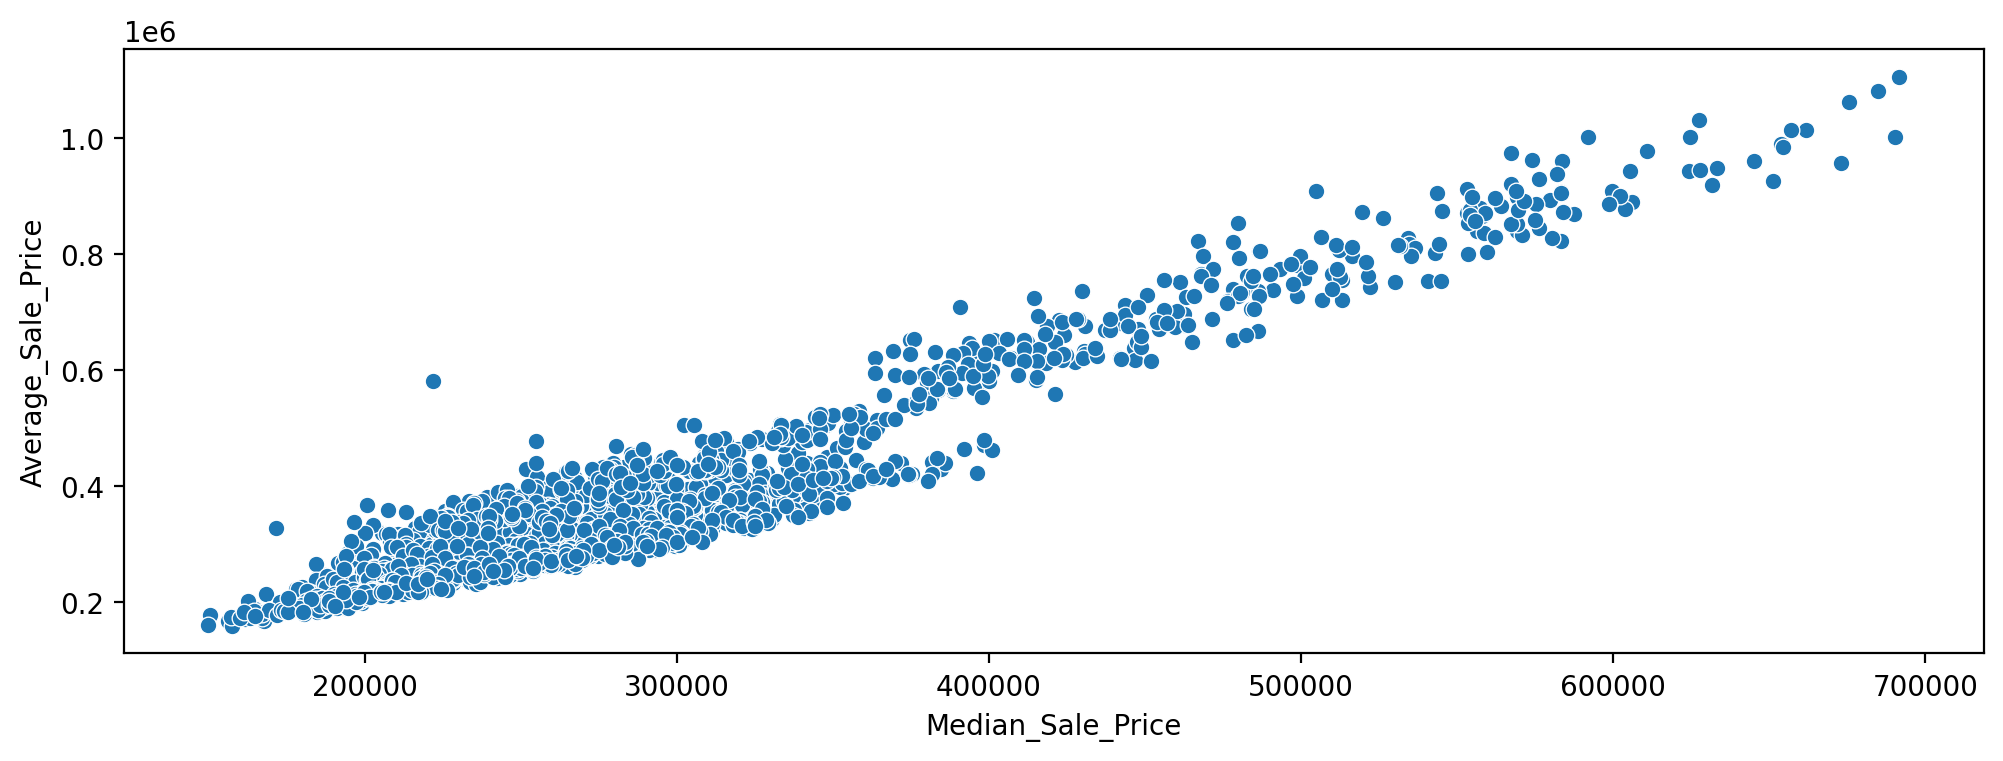

In [10]:
# Scattered Graph for Average adn Median Sale Price view
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(x=df['Median_Sale_Price'],
                y=df['Average_Sale_Price'])

In [11]:
#missing values

missingValues = df[(df['Median_Sale_Price']=='')]
print(missingValues.head(10))

Empty DataFrame
Columns: [Date, Median_Sale_Price, Average_Sale_Price, County]
Index: []


In [12]:
#colums heading into list
list(df.columns)


['Date', 'Median_Sale_Price', 'Average_Sale_Price', 'County']

# Reading Data from Stock CSV file

In [12]:
# bringing in Aapple stock's data with dates

dfaapl = pd.read_csv('AAPL.csv',index_col='Date',parse_dates= True)

In [13]:
#checking to see values working

dfaapl.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-28,172.169998,175.729996,172.000000,175.600006,174.542679,90371900
2022-03-29,176.690002,179.009995,176.339996,178.960007,177.882462,100589400
2022-03-30,178.550003,179.610001,176.699997,177.770004,176.699615,92633200
2022-03-31,177.839996,178.029999,174.399994,174.610001,173.558640,103049300
2022-04-01,174.029999,174.880005,171.940002,174.309998,173.260437,78751300


In [14]:
dfgoog = pd.read_csv('GOOG.csv',index_col='Date',parse_dates= True)

In [15]:

#checking goog 
dfgoog.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-28,140.684494,141.976501,139.828156,141.949997,141.949997,23774000
2022-03-29,143.160507,144.162506,142.483994,143.250000,143.250000,28678000
2022-03-30,142.869995,143.480499,142.167999,142.644501,142.644501,21046000
2022-03-31,142.448502,142.644501,139.619003,139.649506,139.649506,29516000
2022-04-01,140.009995,140.949997,138.796997,140.699997,140.699997,23480000


In [16]:
#reading Data from Files using Import CSV loop and list
myAapl=open("AAPL.csv","r")
reader = csv.reader(myAapl)
headers=next(reader,None)
#column headers
print(headers)
count = 0
for x in reader:
    #date,open,close,volume
    print(x[0],x[1],x[4],x[6])
    count = count +1
print(count)
myAapl.close()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
2022-03-28 172.169998 175.600006 90371900
2022-03-29 176.690002 178.960007 100589400
2022-03-30 178.550003 177.770004 92633200
2022-03-31 177.839996 174.610001 103049300
2022-04-01 174.029999 174.309998 78751300
2022-04-04 174.570007 178.440002 76468400
2022-04-05 177.500000 175.059998 73401800
2022-04-06 172.360001 171.830002 89058800
2022-04-07 171.160004 172.139999 77594700
2022-04-08 171.779999 170.089996 76575500
2022-04-11 168.710007 165.750000 72246700
2022-04-12 168.020004 167.660004 79265200
2022-04-13 167.389999 170.399994 70618900
2022-04-14 170.619995 165.289993 75329400
2022-04-18 163.919998 165.070007 69023900
2022-04-19 165.020004 167.399994 67723800
2022-04-20 168.759995 167.229996 67929800
2022-04-21 168.910004 166.419998 87227800
2022-04-22 166.460007 161.789993 84882400
2022-04-25 161.119995 162.880005 96046400
2022-04-26 162.250000 156.800003 95623200
2022-04-27 155.910004 156.570007 88063200
2022-04-28

# Visualizing the  Stock data and  Analyzing it

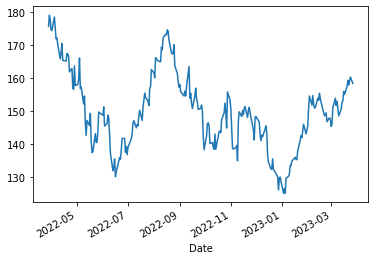

In [17]:
#testing the graph and to see if stock is going up or down with trend line
dfaapl['Close'].plot()
plt.show()

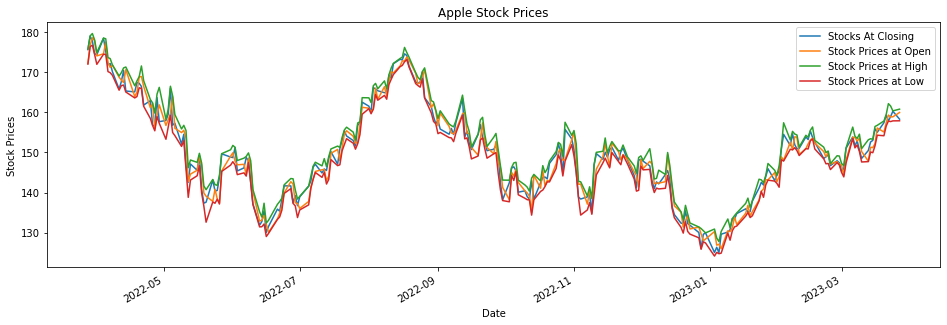

In [18]:
#Stock graph 
dfaapl['Close'].plot(label='Stocks At Closing', figsize=(16,5))
dfaapl['Open'].plot(label='Stock Prices at Open')
dfaapl['High'].plot(label='Stock Prices at High')
dfaapl['Low'].plot(label='Stock Prices at Low')
plt.legend()
plt.title('Apple Stock Prices')
plt.ylabel('Stock Prices')
plt.show()

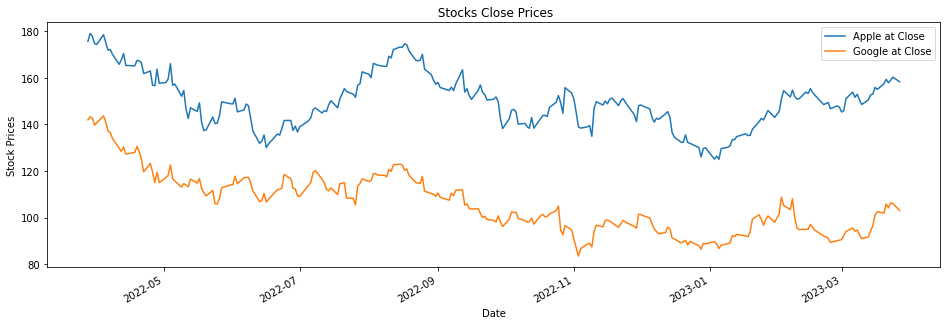

In [19]:
#Comparing Apple and Google at Close to see how we can pridict one stock by another stock
dfaapl['Close'].plot(label='Apple at Close', figsize=(16,5))
dfgoog['Close'].plot(label='Google at Close')
plt.legend()
plt.title(' Stocks Close Prices')
plt.ylabel('Stock Prices')
plt.show()


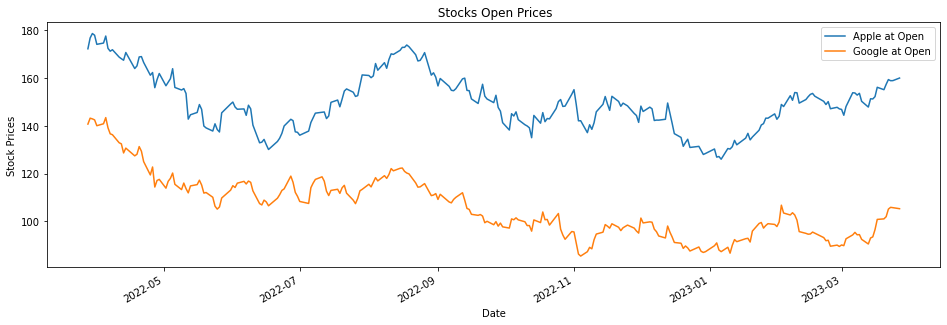

In [20]:
#Comparing Apple and Google at Open to see how we can pridict one stock by another stock
dfaapl['Open'].plot(label='Apple at Open', figsize=(16,5))
dfgoog['Open'].plot(label='Google at Open')

plt.legend()
plt.title(' Stocks Open Prices')
plt.ylabel('Stock Prices')
plt.show()


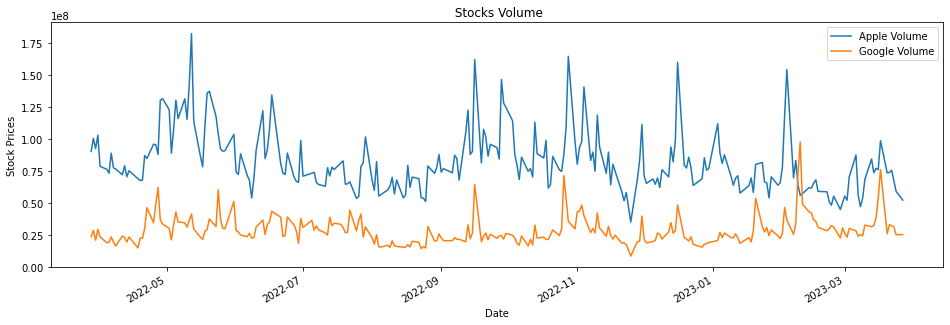

In [21]:
#Comparing Apple and Google Volume to see how we can pridict one stock by another stock
dfaapl['Volume'].plot(label='Apple Volume', figsize=(16,5))
dfgoog['Volume'].plot(label='Google Volume')

plt.legend()
plt.title(' Stocks Volume')
plt.ylabel('Stock Prices')
plt.show()


In [22]:
#Analyzing the Market Gap. First add Column 'Total Traded Aapleinto CSV'
dfaapl['Total Traded']= dfaapl['Open']*dfaapl['Volume']

# Check to see if Column was added
dfaapl



,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2022-03-28,172.169998,175.729996,172.000000,175.600006,174.542679,90371900,1.555933e+10
2022-03-29,176.690002,179.009995,176.339996,178.960007,177.882462,100589400,1.777314e+10
2022-03-30,178.550003,179.610001,176.699997,177.770004,176.699615,92633200,1.653966e+10
2022-03-31,177.839996,178.029999,174.399994,174.610001,173.558640,103049300,1.832629e+10
2022-04-01,174.029999,174.880005,171.940002,174.309998,173.260437,78751300,1.370509e+10
...,...,...,...,...,...,...,...
2023-03-21,157.320007,159.399994,156.539993,159.279999,159.279999,73938300,1.163197e+10
2023-03-22,159.300003,162.139999,157.809998,157.830002,157.830002,75701800,1.205930e+10
2023-03-23,158.830002,161.550003,157.679993,158.929993,158.929993,67622100,1.074042e+10


In [23]:
#Now add Total Traded Column into Google Stock
dfgoog['Total Traded']= dfgoog['Open']*dfgoog['Volume']

# Check to see if Column was added
dfgoog

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2022-03-28,140.684494,141.976501,139.828156,141.949997,141.949997,23774000,3.344633e+09
2022-03-29,143.160507,144.162506,142.483994,143.250000,143.250000,28678000,4.105557e+09
2022-03-30,142.869995,143.480499,142.167999,142.644501,142.644501,21046000,3.006842e+09
2022-03-31,142.448502,142.644501,139.619003,139.649506,139.649506,29516000,4.204510e+09
2022-04-01,140.009995,140.949997,138.796997,140.699997,140.699997,23480000,3.287435e+09
...,...,...,...,...,...,...,...
2023-03-21,101.980003,105.959999,101.860001,105.839996,105.839996,33122800,3.377863e+09
2023-03-22,105.139999,107.510002,104.209999,104.220001,104.220001,32336900,3.399902e+09
2023-03-23,105.889999,107.100998,105.410004,106.260002,106.260002,31385800,3.323442e+09


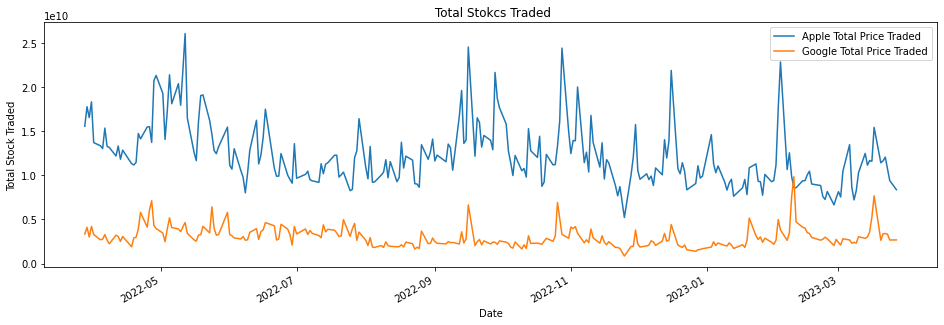

In [24]:
#plotting Total traded for my stocks 
dfaapl['Total Traded'].plot(label='Apple Total Price Traded', figsize=(16,5))
dfgoog['Total Traded'].plot(label='Google Total Price Traded')

plt.legend()
plt.title(' Total Stokcs Traded')
plt.ylabel('Total Stock Traded')
plt.show()
#

In [25]:
#Apple maximum Open price

print(dfaapl.Open.max())

178.550003


In [26]:
#what Row has the maximum open price

print(dfaapl[dfaapl.Open == dfaapl.Open.max()])

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-30  178.550003  179.610001  176.699997  177.770004  176.699615   

              Volume  Total Traded  
Date                                
2022-03-30  92633200  1.653966e+10  


In [27]:
# I would like to know when the peak of total traded happened for Apple Stock
# first where where exactly in data is the highest point

dfaapl['Total Traded'].argmax()

# when happened
dfaapl.iloc[[dfaapl['Total Traded'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2022-05-12,142.770004,146.199997,138.800003,142.559998,141.909805,182602000,2.607009e+10


In [28]:
#Now Same  peak for Google Stock
dfgoog['Total Traded'].argmax()

# when happened
dfgoog.iloc[[dfgoog['Total Traded'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2023-02-09,100.540001,100.610001,93.860001,95.459999,95.459999,97798600,9.832671e+09


In [29]:
pwd

'C:\\Users\\sajid\\Final_Project'